In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df= pd.read_csv("Breast_cancer_data.csv")

In [3]:
df

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0
565,20.13,28.25,131.20,1261.0,0.09780,0
566,16.60,28.08,108.30,858.1,0.08455,0
567,20.60,29.33,140.10,1265.0,0.11780,0


In [5]:
data= df.to_numpy()
X= data[:, 0:5]
print(X.shape)
y= data[:, 5]
m= y.shape[0]
y= y.reshape(m, 1)
X= np.insert(X, 0, np.ones((1,m)), axis= 1)
print(X)

(569, 5)
[[1.000e+00 1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01]
 [1.000e+00 2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02]
 [1.000e+00 1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01]
 ...
 [1.000e+00 1.660e+01 2.808e+01 1.083e+02 8.581e+02 8.455e-02]
 [1.000e+00 2.060e+01 2.933e+01 1.401e+02 1.265e+03 1.178e-01]
 [1.000e+00 7.760e+00 2.454e+01 4.792e+01 1.810e+02 5.263e-02]]


In [7]:
from sklearn.model_selection import train_test_split

In [11]:
def hypothesis(X, theta):
    tmp = X@theta
    yest= 1/(1+(np.exp(-(tmp))))
    return yest

def cost(X, y, theta):
    m= X.shape[0]
    Yest= hypothesis(X, theta)
    lh1= np.log(Yest)
    lh2= np.log(1-Yest)
    cs= -((lh1.T@y)+lh2.T@(1-y))/m
    return cs

def gradient(X, y, theta):
    gr= np.zeros((6,1))
    Yest= hypothesis(X, theta)
    err= Yest- y
    m= X.shape[0]
    gr= X.T@err/m    
    return gr

def normalize(X):
    cols= X.shape[1]
    Xmean= np.mean(X, axis= 0)
    Xmin= np.min(X, axis= 0)
    Xmax= np.max(X, axis= 0)
    X_norm = X.copy()
    for i in range(1, cols):
        X_norm[:, i]= (X_norm[:, i]- Xmean[i])/(Xmax[i]- Xmin[i])
    return X_norm

X_norm= normalize(X)


In [12]:
X_norm

array([[ 1.        ,  0.18281548, -0.30130702,  0.21305346,  0.14681268,
         0.1989683 ],
       [ 1.        ,  0.30492254, -0.05139156,  0.28284822,  0.28467058,
        -0.10490459],
       [ 1.        ,  0.26327362,  0.06629528,  0.26280814,  0.23249667,
         0.11952441],
       ...,
       [ 1.        ,  0.11702912,  0.29727262,  0.11285306,  0.08619762,
        -0.10661985],
       [ 1.        ,  0.30634239,  0.3395452 ,  0.33260291,  0.25879571,
         0.19355167],
       [ 1.        , -0.3013532 ,  0.1775567 , -0.30439523, -0.20101341,
        -0.39478452]])

In [13]:
X_train, X_test, Y_train, Y_test= train_test_split(X_norm, y, test_size=0.2, random_state=0)
print("Number of training examples in train_set and test_set", X_train.shape[0], Y_train.shape[0])

Number of training examples in train_set and test_set 455 455


In [ ]:
N= 30000
alpha= 0.03
m= Y_train.shape[0]
theta= np.zeros((6, 1))
prev_cost= cost(X_train, Y_train, theta)
print("Cost before training:", prev_cost)
for i in range(N):
    print(i, prev_cost) # ------>   J_history
    theta= theta- alpha* gradient(X_train, Y_train, theta)
    current_cost= cost(X_train, Y_train, theta)
    if abs(prev_cost- current_cost)<1e-6:
        print(i)
        break
    prev_cost= current_cost
print("Final theta", theta)
print("\n")
print("Cost after Training:", prev_cost)
    

In [22]:
def findMSE(X, y, theta):
    m= X.shape[0]
    Y_pred= hypothesis(X, theta)
    Y_pred= [1 if i>= 0.5 else 0 for i in Y_pred]
    Y_pred= np.array(Y_pred).reshape(m, 1)
    err= Y_pred- y
    mse= err.T@err/m
    return mse

print("Train_mse:", findMSE(X_train, Y_train, theta))


Train_mse: [[0.07692308]]


In [23]:
print("Test_mse:", findMSE(X_test, Y_test, theta))

Test_mse: [[0.0877193]]


# Confusion Matrix Evaluation

In [24]:
true_positive, true_negative, false_positive, false_negative= 0,0, 0, 0
m= X_test.shape[0]
Y_pred= hypothesis(X_test, theta)
Y_pred= [1 if i>= 0.5 else 0 for i in Y_pred]
Y_pred= np.array(Y_pred).reshape(m, 1)
for i in range(m):
    if Y_pred[i]== 0 and Y_test[i]==0:
        true_negative+=1
    elif Y_pred[i]==1 and Y_test[i]==0:
        false_positive+=1
    elif Y_pred[i]==1 and Y_test[i]==1:
        true_positive+=1
    elif Y_pred[i]==0 and Y_test[i]==1:
        false_negative+=1
print(true_positive, true_negative, false_positive, false_negative)
P = true_positive/(true_positive+false_positive)
R = true_positive/(true_positive+false_negative)
F1 = 2*P*R/(P+R)
print("Accuracy:",(true_positive+true_negative)/m)
print("P R F1",P,R,F1)

63 41 6 4
Accuracy: 0.9122807017543859
P R F1 0.9130434782608695 0.9402985074626866 0.9264705882352942


# Logistic Regression on mnist dataset

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
traindata= pd.read_csv("mnist_train.csv")
testdata= pd.read_csv("mnist_test.csv")
traindataset= traindata.to_numpy()
testdataset= testdata.to_numpy()
print(traindataset.shape, testdataset.shape)
train_labels= traindataset[:, 0].reshape(60000, 1)    # 60000 training samples are present in traindataset
test_labels= testdataset[:, 0].reshape(10000, 1)         # 10000 testing samples are present in testdataset
train_features= traindataset[:, 1:]
test_features= testdataset[:, 1:]

(60000, 785) (10000, 785)


# sample Representation

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  13  25 100
  122   7   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  33 151 208 252 252
  252 146   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  40 152 244 252 253 224 211
  252 232  40   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  15 152 239 252 252 252 21

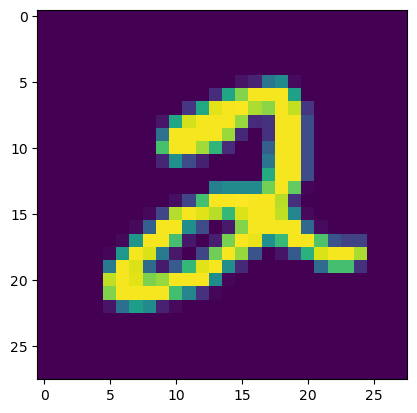

This is: 2


In [7]:
i= 5   # ith sample in the data
np.printoptions(linewidth= 600)
print(train_features[i, :].reshape((28, 28)))        #the each samples have 784 values which can be reshaped into 28*28 matrix form
plt.imshow(train_features[i, :].reshape((28, 28)))   # imshow shows the pixels by taking the values as the value of intensity
plt.show()
print("This is:", train_labels[i, 0])

# Normalize features

In [8]:
# Here normalizeation is done by diving the dataset with max value in the data i.e in MNIST the max value is approx 255.
train_features= train_features/255
test_features= test_features/255

In [9]:
m_train = train_features.shape[0]
m_test= test_features.shape[0]
train_features= np.insert(train_features, 0, np.ones((1, m_train)), axis= 1)
test_features= np.insert(test_features, 0, np.ones((1, m_test )), axis= 1)

In [14]:
def hypothesis(X, theta):
    tmp = X@theta
    Yest= 1/(1+(np.exp(-tmp)))
    return Yest

def cost(X, y, theta):
    m= X.shape[0]
    lh1= np.log(hypothesis(X, theta))
    lh2= np.log(1- (hypothesis(X, theta)))
    cs= -(lh1.T@y+lh2.T@(1-y))/m
    return cs
def gradient(X, y, theta):
    m= y.shape[0]
    Yest= hypothesis(X, theta)
    err= Yest- y
    gr= (X.T@err)/m
    return gr

train_labels0= np.array([1 if i==0 else 0 for i in train_labels]).reshape(m_train, 1)
train_labels1= np.array([1 if i==1 else 0 for i in train_labels]).reshape(m_train, 1)
train_labels2= np.array([1 if i==2 else 0 for i in train_labels]).reshape(m_train, 1)
train_labels3= np.array([1 if i==3 else 0 for i in train_labels]).reshape(m_train, 1)
train_labels4= np.array([1 if i==4 else 0 for i in train_labels]).reshape(m_train, 1)
train_labels5= np.array([1 if i==5 else 0 for i in train_labels]).reshape(m_train, 1)
train_labels6= np.array([1 if i==6 else 0 for i in train_labels]).reshape(m_train, 1)
train_labels7= np.array([1 if i==7 else 0 for i in train_labels]).reshape(m_train, 1)
train_labels8= np.array([1 if i==8 else 0 for i in train_labels]).reshape(m_train, 1)
train_labels9= np.array([1 if i==9 else 0 for i in train_labels]).reshape(m_train, 1)

In [15]:
def gradient_descent(X, y, theta_initial, alpha, tol, N):
    theta= theta_initial
    prev_cost= cost(X, y, theta)
    print("Cost before training:", prev_cost)
    for i in range(N):
        print("-", end= "")
        theta= theta- alpha*gradient(X, y, theta)
        cs= cost(X, y, theta)
        if abs(prev_cost- cs)<tol:
            print(i)
            break
        prev_cost= cs
    print("the cost after training:", prev_cost)
    return theta



In [16]:
theta_inital= np.zeros((785, 1))
theta0= gradient_descent(train_features, train_labels0, theta_inital, 0.03, 1e-6, 3000 )
theta1= gradient_descent(train_features, train_labels1, theta_inital, 0.03, 1e-6, 3000 )
theta2= gradient_descent(train_features, train_labels2, theta_inital, 0.03, 1e-6, 3000 )
theta3= gradient_descent(train_features, train_labels3, theta_inital, 0.03, 1e-6, 3000 )
theta4= gradient_descent(train_features, train_labels4, theta_inital, 0.03, 1e-6, 3000 )
theta5= gradient_descent(train_features, train_labels5, theta_inital, 0.03, 1e-6, 3000 )
theta6= gradient_descent(train_features, train_labels6, theta_inital, 0.03, 1e-6, 3000 )
theta7= gradient_descent(train_features, train_labels7, theta_inital, 0.03, 1e-6, 3000 )
theta8= gradient_descent(train_features, train_labels8, theta_inital, 0.03, 1e-6, 3000 )
theta9= gradient_descent(train_features, train_labels9, theta_inital, 0.03, 1e-6, 3000 )

Cost before training: [[0.69314718]]
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [18]:
theta= np.concatenate((theta0, theta1, theta2, theta3, theta4, theta5, theta6, theta7, theta8, theta9), axis= 1)

In [20]:
theta.shape

(785, 10)

In [21]:
theta

array([[-0.67947939, -0.12596979, -0.76482933, ..., -0.3033674 ,
        -1.68213952, -0.9087435 ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [25]:
testPrediction = 1/(1+np.exp(-test_features@theta))
i = 1003
print(testPrediction[i,:])
print(np.argmax(testPrediction[i,:]))
print(test_labels[i])

[3.61221678e-04 3.14821596e-07 5.16941061e-04 4.00406839e-01
 1.89973454e-06 5.53674883e-01 3.82089047e-07 2.16860535e-06
 9.53381239e-02 2.06206713e-05]
5
[5]


In [26]:
testPred = np.argmax(testPrediction,axis=1).reshape(10000,1)
print(testPred)

[[7]
 [2]
 [1]
 ...
 [4]
 [8]
 [6]]


In [27]:
correct = [1 if testPred[i]==test_labels[i] else 0 for i in range(0,10000)]
accuracy = np.sum(correct)/10000
print(accuracy*100)

89.92


# Logistic_regression on university admission dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('E:\VS CODE\machine-learning-andrew-ng-master\machine-learning-andrew-ng-master\data\ex2data1.txt', sep=',', header=None)
df.columns = ['exam_score_1', 'exam_score_2', 'label']

In [3]:
df

,exam_score_1,exam_score_2,label
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
...,...,...,...
95,83.489163,48.380286,1
96,42.261701,87.103851,1
97,99.315009,68.775409,1
98,55.340018,64.931938,1


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
exam_score_1,100.0,65.644274,19.458222,30.058822,50.919511,67.032988,80.212529,99.827858
exam_score_2,100.0,66.221998,18.582783,30.603263,48.179205,67.682381,79.360605,98.869436
label,100.0,0.600000,0.492366,0.000000,0.000000,1.000000,1.000000,1.000000


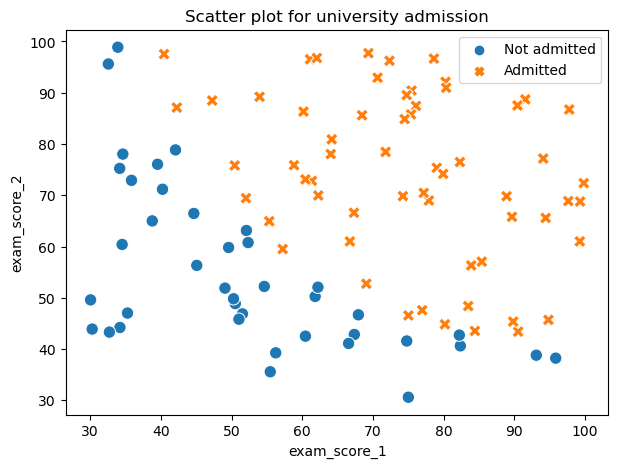

In [8]:
plt.figure(figsize=(7,5))
plot= sns.scatterplot(x= "exam_score_1", y= "exam_score_2", data= df, hue= "label", style= "label", s= 80)
#hue---> here hue means how color to be differentiated, so here labe column is used to differentiate the color
#style---> Here style means how to differentiate the markers to be used, so here the lanel column is used to differentiate the style
# s--> size of marker
handles, labels= plot.get_legend_handles_labels()
plot.legend(handles[0:], ["Not admitted", "Admitted"])
plt.title("Scatter plot for university admission")
plt.show()

In [92]:
def sigmoid(z):
    z= np.array(z)
    return 1/(1+np.exp(-z))

In [123]:
def cost_function(theta, X, y):
    m = y.shape[0]
    theta = theta[:, np.newaxis] #trick to make numpy minimize work
    h = sigmoid(X.dot(theta))
    J = (1/m) * (-y.T.dot(np.log(h)) - (1-y).T.dot(np.log(1-h)))

    diff_hy = h - y
    grad = (1/m) * diff_hy.T.dot(X)

    return J, grad

In [124]:
m = df.shape[0]
X = np.hstack((np.ones((m,1)),df[['exam_score_1', 'exam_score_2']].values))
y = np.array(df.label.values).reshape(-1,1)
initial_theta = np.zeros(shape=(X.shape[1]))

In [125]:
cost, grad = cost_function(initial_theta, X, y)
print('Cost at initial theta (zeros):', cost)
print('Expected cost (approx): 0.693')
print('Gradient at initial theta (zeros):')
print(grad.T)
print('Expected gradients (approx):\n -0.1000\n -12.0092\n -11.2628')

Cost at initial theta (zeros): [[0.69314718]]
Expected cost (approx): 0.693
Gradient at initial theta (zeros):
[[ -0.1       ]
 [-12.00921659]
 [-11.26284221]]
Expected gradients (approx):
 -0.1000
 -12.0092
 -11.2628


In [126]:
import scipy.optimize as opt
def optimize_theta(X, y, initial_theta):
    opt_results = opt.minimize(cost_function, initial_theta, args=(X, y), method='TNC',
                               jac=True, options={'maxiter':400})
    return opt_results['x'], opt_results['fun']

In [127]:
opt_theta, cost = optimize_theta(X, y, initial_theta)

C:\Users\JAGADISH\AppData\Local\Temp\ipykernel_10980\1274892550.py:3: DeprecationWarning: 'maxiter' has been deprecated in favor of 'maxfun' and will be removed in SciPy 1.11.0.
  opt_results = opt.minimize(cost_function, initial_theta, args=(X, y), method='TNC',


In [128]:
opt_theta

array([-25.16131862,   0.20623159,   0.20147149])

In [129]:
cost

0.20349770158947464

# Decision Boundary

[ 26.57037068 103.31630956]


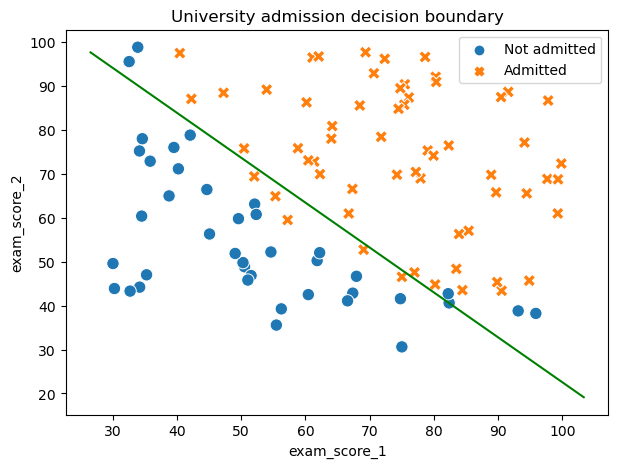

In [156]:
plt.figure(figsize= (7, 5))
plot= sns.scatterplot(x= "exam_score_1", y= "exam_score_2", data= df, hue= "label", style= "label", s= 80)
handles, labels= plot.get_legend_handles_labels()
plot.legend(handles[0:], ["Not admitted", "Admitted"])
plt.title("University admission decision boundary")

plot_x= np.array(plot.get_xlim())
print(plot_x)
plot_y = (-opt_theta[1]/opt_theta[2]) * plot_x - opt_theta[0]/opt_theta[2]
plt.plot(plot_x, plot_y, "-", c= "green")
plt.show(plot)

# Evaluating Logistic Regression 

In [157]:
prob= sigmoid(np.array([1, 45, 85]).dot(opt_theta))
print("The prob of getting admission of student with 45 and 85 marks is:", prob)

The prob of getting admission of student with 45 and 85 marks is: 0.7762906236225744


# Accuracy on training set

In [160]:
def predict(X, theta):
    y_pred= [1 if sigmoid(X[i, :].dot(theta))>= 0.5 else 0 for i in range(0, X.shape[0])]
    return y_pred

In [161]:
y_pred_prob = predict(X, opt_theta)

In [162]:
y_pred_prob

[0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1]

In [165]:
y_pred_prob== df.label.values

array([ True,  True,  True,  True,  True,  True,  True, False,  True,
        True, False,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True, False,  True,  True,
       False,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True])

In [163]:
f'Train Accuracy: {np.mean(y_pred_prob== df.label.values)*100}'


'Train Accuracy: 89.0'

# Equivalent with Sklearn

In [167]:
from sklearn.linear_model import LogisticRegression
log_reg= LogisticRegression(solver= "newton-cg", max_iter= 400)
log_reg.fit(df[['exam_score_1', "exam_score_2"]].values, df.label.values)

LogisticRegression(max_iter=400, solver='newton-cg')

In [168]:
log_reg.intercept_, log_reg.coef_

(array([-25.05200378]), array([[0.2053533 , 0.20058239]]))

#Accuracy with sklearn

In [170]:
log_reg.score(df[['exam_score_1', 'exam_score_2']].values,df.label.values)

0.89

# Regularized Logistic Regression

Visualization of the data

In [181]:
df2= pd.read_csv("E:\VS CODE\machine-learning-andrew-ng-master\machine-learning-andrew-ng-master\data\ex2data2.txt", sep =",", header= None)
df2.columns= ['test_1', 'test_2', 'label']

In [182]:
df2

,test_1,test_2,label
0,0.051267,0.699560,1
1,-0.092742,0.684940,1
2,-0.213710,0.692250,1
3,-0.375000,0.502190,1
4,-0.513250,0.465640,1
...,...,...,...
113,-0.720620,0.538740,0
114,-0.593890,0.494880,0
115,-0.484450,0.999270,0
116,-0.006336,0.999270,0


In [183]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
test_1,118.0,0.054779,0.496654,-0.83007,-0.372120,-0.006336,0.478970,1.0709
test_2,118.0,0.183102,0.519743,-0.76974,-0.254385,0.213455,0.646563,1.1089
label,118.0,0.491525,0.502060,0.00000,0.000000,0.000000,1.000000,1.0000


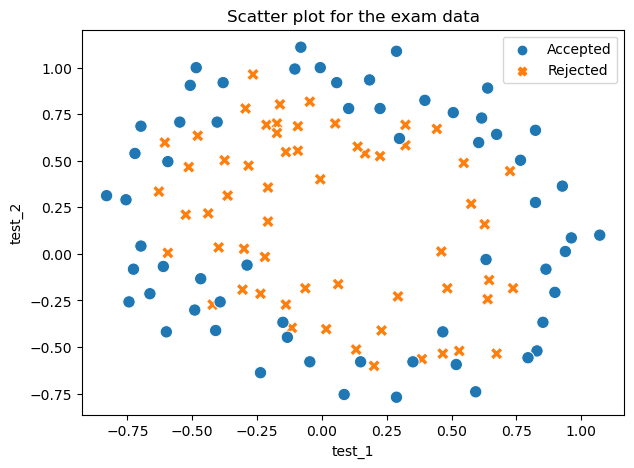

In [184]:
plt.figure(figsize=(7,5))
plot= sns.scatterplot(x= "test_1", y= "test_2", data= df2, hue= "label", style= "label", s= 80)
handles, labels= plot.get_legend_handles_labels()
plt.legend(handles[0:], ["Accepted", "Rejected"])
plt.title("Scatter plot for the exam data")
plt.show()

In [187]:
def map_feature(X1, X2, degree):
    X1 = np.array(X1).reshape(-1,1)
    X2 = np.array(X2).reshape(-1,1)
    
    out = np.ones((X1.shape[0], 1))
    for i in range(1, degree+1):
        for j in range(0, i+1):
            p = (X1**(i-j)) * (X2**j)
            out = np.append(out, p, axis=1)
    return out

In [188]:
X_p = map_feature(df2.test_1.values, df2.test_2.values, 6)
X_p.shape

(118, 28)

In [189]:
def cost_function_reg(theta, X, y, lambda_reg):
    m = y.shape[0]
    theta = theta[:, np.newaxis] 
    h = sigmoid(X.dot(theta))
    J = (1/m) * (-y.T.dot(np.log(h)) - (1-y).T.dot(np.log(1-h))) + (lambda_reg/(2*m)) * np.sum(theta[1:]**2)

    diff_hy = h - y
    grad = (1/m) * diff_hy.T.dot(X) + ((lambda_reg/m) * theta.T)
    grad[0, 0] = (1/m) * diff_hy.T.dot(X[:, 0])

    return J, grad

In [190]:
import scipy.optimize as opt
def optimize_theta_reg(X, y, initial_theta, lambda_reg):
    opt_results = opt.minimize(cost_function_reg, initial_theta, args=(X, y, lambda_reg), method='TNC', jac=True, options={'maxiter':400})
    return opt_results['x'], opt_results['fun']

In [191]:
m = df.shape[0]
X = X_p
y = np.array(df2.label.values).reshape(-1,1)
initial_theta = np.zeros(shape=(X.shape[1]))

In [192]:
lambda_reg = 1
cost, grad = cost_function_reg(initial_theta, X, y, lambda_reg)

In [193]:
print(grad.T[:5])

[[8.47457627e-03]
 [1.87880932e-02]
 [7.77711864e-05]
 [5.03446395e-02]
 [1.15013308e-02]]


In [194]:
lambda_reg = 10
initial_theta = np.ones(shape=(X.shape[1]))
cost, grad = cost_function_reg(initial_theta, X, y, lambda_reg)

In [195]:
print(grad.T[:5])

[[0.34604507]
 [0.16135192]
 [0.19479576]
 [0.22686278]
 [0.09218568]]


C:\Users\JAGADISH\AppData\Local\Temp\ipykernel_10980\968707659.py:3: DeprecationWarning: 'maxiter' has been deprecated in favor of 'maxfun' and will be removed in SciPy 1.11.0.
  opt_results = opt.minimize(cost_function_reg, initial_theta, args=(X, y, lambda_reg), method='TNC', jac=True, options={'maxiter':400})
C:\Users\JAGADISH\AppData\Local\Temp\ipykernel_10980\968707659.py:3: DeprecationWarning: 'maxiter' has been deprecated in favor of 'maxfun' and will be removed in SciPy 1.11.0.
  opt_results = opt.minimize(cost_function_reg, initial_theta, args=(X, y, lambda_reg), method='TNC', jac=True, options={'maxiter':400})
C:\Users\JAGADISH\AppData\Local\Temp\ipykernel_10980\968707659.py:3: DeprecationWarning: 'maxiter' has been deprecated in favor of 'maxfun' and will be removed in SciPy 1.11.0.
  opt_results = opt.minimize(cost_function_reg, initial_theta, args=(X, y, lambda_reg), method='TNC', jac=True, options={'maxiter':400})
C:\Users\JAGADISH\AppData\Local\Temp\ipykernel_10980\96870

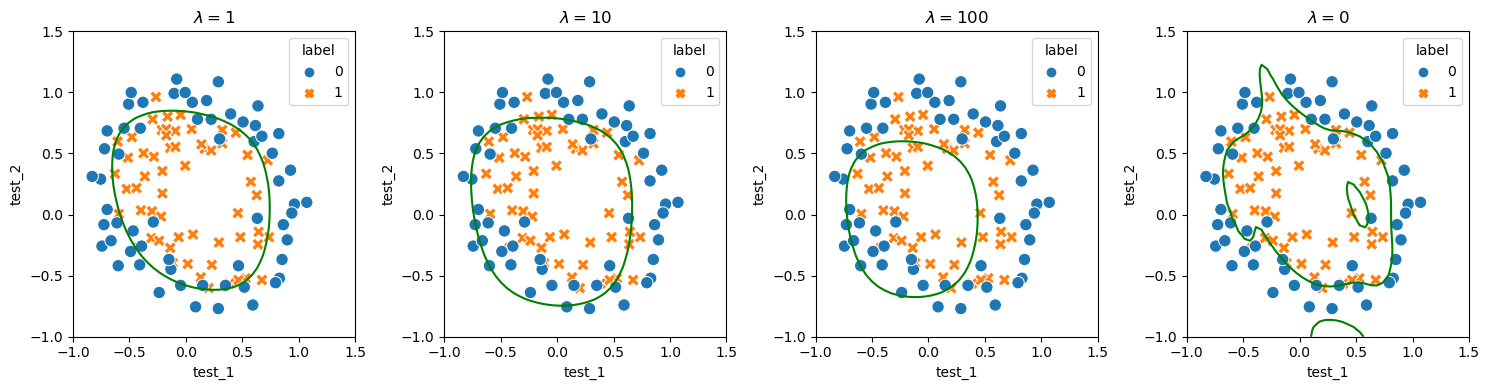

In [196]:
lambda_reg = [1, 10, 100, 0]
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(15,4))
u = np.linspace(-1, 1.5, 50)
v = np.linspace(-1, 1.5, 50)

for il, l in enumerate(lambda_reg):
    theta_opt, cost = optimize_theta_reg(X, y, initial_theta, l)
    z = np.zeros((u.shape[0], v.shape[0]))
    for i in range(len(u)):
        for j in range(len(v)):
            z[i,j] = map_feature(u[i], v[j], 6).dot(theta_opt)
    
    sns.scatterplot(x='test_1', y='test_2', hue='label', data=df2, style='label', s=80, ax=axs[il])
    
    axs[il].contour(u, v, z.T, levels=[0], colors='green')
    axs[il].set_title('$\lambda={}$'.format(l))
fig.tight_layout()
plt.show()

In [197]:
lambda_reg = 1
theta, cost = optimize_theta_reg(X, y, initial_theta, lambda_reg)
theta

C:\Users\JAGADISH\AppData\Local\Temp\ipykernel_10980\968707659.py:3: DeprecationWarning: 'maxiter' has been deprecated in favor of 'maxfun' and will be removed in SciPy 1.11.0.
  opt_results = opt.minimize(cost_function_reg, initial_theta, args=(X, y, lambda_reg), method='TNC', jac=True, options={'maxiter':400})


array([ 1.27273509,  0.62525435,  1.18108521, -2.01994882, -0.91742556,
       -1.43167368,  0.12399628, -0.36552234, -0.35723208, -0.17514253,
       -1.4581339 , -0.05098852, -0.61553085, -0.27470069, -1.19280263,
       -0.24220871, -0.20601057, -0.04472767, -0.2777735 , -0.29536755,
       -0.45637086, -1.04318579,  0.02776829, -0.29241701,  0.01556523,
       -0.32737793, -0.14388044, -0.92463148])

In [198]:
y_pred_prob = predict(X, theta)
f'Train accuracy: {np.mean(y_pred_prob == df2.label.values) * 100}'

'Train accuracy: 83.05084745762711'

In [199]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver='newton-cg', max_iter=400)
log_reg.fit(X[:,1:], df2.label.values)

LogisticRegression(max_iter=400, solver='newton-cg')

In [200]:
log_reg.intercept_, log_reg.coef_

(array([1.27273852]),
 array([[ 0.62527427,  1.18107953, -2.01995701, -0.91743361, -1.43166228,
          0.12400943, -0.36552879, -0.35723375, -0.1751281 , -1.45816817,
         -0.05099315, -0.61556795, -0.27470949, -1.19281161, -0.24218951,
         -0.20599958, -0.04473522, -0.27778736, -0.29537501, -0.45635027,
         -1.04321271,  0.02777197, -0.29243756,  0.0155633 , -0.32738395,
         -0.14388956, -0.92464266]]))

In [201]:
log_reg.score(X[:,1:], df2.label.values)

0.8305084745762712